<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/DL/CNN/lec99_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lec05. 합성곱 신경망 (Convolutional neural network, CNN)
* 이미지 분석 및 분류에 가장 일반적으로 사용되는 인공신경망

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, InputLayer,Flatten
import tensorflow as tf


import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# from sklearn.datasets import load_boston
from keras.datasets     import mnist



# Data Load 

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 전처리 & 가공

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test  = X_test.reshape((10000, 28, 28, 1))
X_train, X_test = X_train / 255.0,   X_test / 255.0

# CNN 합성곱 신경망 
* Conv2D(32, (3, 3) ... )
<pre>
  - 32    : 필터 (filter)         : 이미지에서 특징 (feature)을 분리,  출력 공간의 차원 (깊이) 결정
  - (3:3) : 커널크기(kernel_size) : 합성곱에 사용되는 필터(=커널)  크기
</pre>
  
* 맥스풀링 (Max-pooling) : 특정 영역에서 가장 큰 값을 샘플링하는 풀링 방식  

* strides : 풀링 필터를 이동시키는 간격

<img src="https://codetorial.net/tensorflow/_images/convolutional_neural_network_04.png" width=700>

In [ ]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  #  filters 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

# FC 추가

<img src="https://codetorial.net/tensorflow/_images/convolutional_neural_network_05.png" width=700>

In [ ]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

* 모델 구성 : Sequential([]) 사용 예

In [ ]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
# 모델 컴파일

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 학습 & 평가

In [ ]:
res = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0153 - val_accuracy: 0.9955
Epoch 2/5
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0203 - val_accuracy: 0.9935
Epoch 3/5
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0114 - val_accuracy: 0.9968
Epoch 4/5
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.0151 - val_accuracy: 0.9960
Epoch 5/5
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0083 - accuracy: 0.9970 - val_loss: 0.0164 - val_accuracy: 0.9953


In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(loss, acc)

313/313 - 2s - loss: 0.0481 - accuracy: 0.9857 - 2s/epoch - 5ms/step


# 훈련 시각화

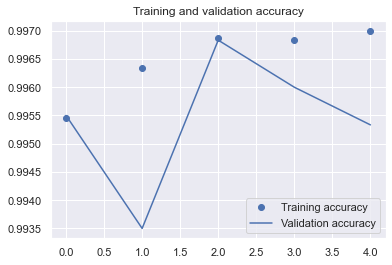

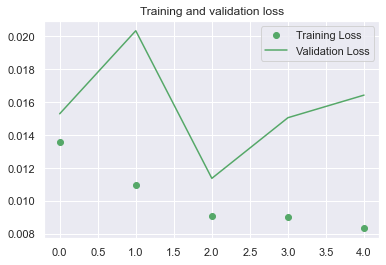

In [ ]:
import matplotlib.pyplot as plt

acc = res.history['accuracy']
val_acc = res.history['val_accuracy']
loss = res.history['loss']
val_loss = res.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()